# Neural Networks

## XNOR

In [1]:
import numpy as np
from si.data import Dataset
X = np.array([[0,0], [0,1], [1,0], [1,1]])#data
y = np.array([[1], [0], [0], [1]])#label
dataset = Dataset(X,y,['X1','X2'],'X1 XNOR X2')

In [2]:
dataset.toDataframe()

,X1,X2,X1 XNOR X2
0,0,0,1
1,0,1,0
2,1,0,0
3,1,1,1


In [3]:
from si.supervised import NN, Dense, Activation
from si.util import Sigmoid, cross_entropy, cross_entropy_prime

In [4]:
# layer1 weights
w1 = np.array([[20,-20],[20,-20]])
b1 = np.array([[-30, 10]])
l1 = Dense(2, 2)
l1.setWeights(w1,b1)

In [5]:
# layer2 weights
w2 = np.array([[20],[20]])
b2 = np.array([[-10]])
l2 = Dense(2, 1)
l2.setWeights(w2,b2)

In [6]:
# Build the NN
nn = NN()
nn.add(l1)
nn.add(Activation(Sigmoid()))#chama a activation function sigmoid
nn.add(l2)
nn.add(Activation(Sigmoid()))#chama a activation function sigmoid
# pass the info that the model is fitted
nn.is_fitted = True

In [7]:
np.round(nn.predict(dataset.X)) #dataset.X = data para obter o output

array([[1.],
       [0.],
       [0.],
       [1.]])

In [8]:
nn.cost(dataset.X,dataset.y)

2.066588540474394e-09

## Train the model using backpropagation

In [9]:
nn2 = NN(epochs=100000,lr=0.1, verbose=False)
nn2.add(Dense(2, 2))
nn2.add(Activation(Sigmoid()))
nn2.add(Dense(2, 1))
nn2.add(Activation(Sigmoid()))
# use cross entropy instead of MSE as loss function
# nn2.use(cross_entropy,cross_entropy_prime)

In [10]:
nn2.fit(dataset)
nn2.is_fitted = True #não mudava o is_fitted para True, foi forçado aqui

 3195/100000, error= 0.25000168395402605epoch 4048/100000, error= 0.25000133792484125epoch 4478/100000, error= 0.2500011728688533epoch 5439/100000, error= 0.250000823921409epoch 5963/100000, error= 0.25000064402138034epoch 8061/100000, error= 0.24999998299591542epoch 8615/100000, error= 0.24999982139403143epoch 9224/100000, error= 0.24999964872451375epoch 9856/100000, error= 0.24999947435031167epoch 10486/100000, error= 0.24999930471742013epoch 11119/100000, error= 0.2499991378186618epoch 11735/100000, error= 0.24999897819784933epoch 14223/100000, error= 0.2499983499703569epoch 17035/100000, error= 0.24999763760328564epoch 19442/100000, error= 0.24999698750425647epoch 20082/100000, error= 0.249996803435377epoch 21331/100000, error= 0.24999642564652547epoch 22596/100000, error= 0.24999601233590876epoch 23203/100000, error= 0.24999580082782002epoch 23834/100000, error= 0.2499955705210935epoch 25090/100000, error= 0.2499950757368693epoch 26333/100000, error= 0.2499945295764588epoch 28101/

In [11]:
np.round(nn2.predict(X))

array([[1.],
       [0.],
       [0.],
       [1.]])

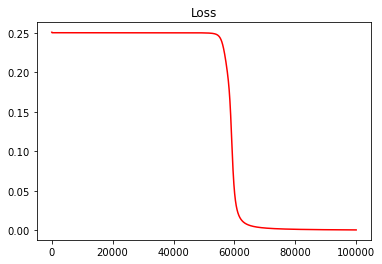

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(list(nn2.history.keys()), list(nn2.history.values()), '-', color='red')
plt.title('Loss')
plt.show()

In [13]:
np.round(nn2.predict(dataset.X))

array([[1.],
       [0.],
       [0.],
       [1.]])

In [14]:
nn2.cost(dataset.X,dataset.y)

0.0006957583651927209